# **Proyek Sistem Rekomendasi**

* Nama : Moh. Aflah Azzaky
* Email : aflahazzaki123@gmail.com
* ID Dicoding : aflahazzaky
* Dataset : [Movie Recommendation Data](https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data)

## **Data Understanding**

### **Import Library**

**Menginstall library yang dibutuhkan dalam pembuatan sistem rekomendasi film**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import warnings
import keras
from keras import layers
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

### **Data Loading**

**Menginstall Kaggle dan mengunduh dataset**

In [2]:
!pip install kaggle

os.environ['KAGGLE_KEY'] = 'bb18e594229a6d36e6251ef61baea580'
os.environ['KAGGLE_USERNAME'] = 'aflahazzaky'

!kaggle datasets download rohan4050/movie-recommendation-data
!unzip movie-recommendation-data.zip

Dataset URL: https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data
License(s): unknown
 84% 11.0M/13.1M [00:00<00:00, 101MB/s]
100% 13.1M/13.1M [00:00<00:00, 91.4MB/s]
Archive:  movie-recommendation-data.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/movies.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: movies_metadata.csv     


## **Data Preprocessing**

**1. Membaca dataset yang telah diunduh dalam format csv**

In [3]:
links_df = pd.read_csv('/content/ml-latest-small/links.csv')
movies_df = pd.read_csv('/content/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('/content/ml-latest-small/ratings.csv')
tags_df = pd.read_csv('/content/ml-latest-small/tags.csv')

Pada tahap diatas adalah membaca dataframe yang telah diunduh.

**2. Menampilkan dataset `links.csv`,`movies.csv`,`ratings.csv`, dan `tags.csv`**

In [4]:
# Fungsi untuk menampilkan DataFrame dengan judul dan jarak
def title_head(title, df):
    display(HTML(f"<h3>{title}</h3>"))  # Menambahkan judul
    display(df.head())  # Menampilkan DataFrame
    display(HTML("<br><hr><br>"))  # Menambahkan jarak dan garis pemisah

title_head('Links DataFrame', links_df)
title_head('Movies DataFrame', movies_df)
title_head('Ratings DataFrame', ratings_df)
title_head('Tags DataFrame', tags_df)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Pada tahap diatas adalah menampilkan isi dari setiap dataset

**3. Menampilkan data unik dari setiap dataset**

In [5]:
print('Jumlah `movieId` data unique dari links', len(links_df['movieId'].unique()))
print('Jumlah `movieId` data unique dari movies', len(movies_df['movieId'].unique()))
print('Jumlah `movieId` data unique dari ratings', len(ratings_df['movieId'].unique()))
print('Jumlah `movieId` data unique dari tags', len(tags_df['movieId'].unique()))
print('Jumlah `userId` data unique dari ratings', len(ratings_df['userId'].unique()))
print('Jumlah `userId` data unique dari tags', len(tags_df['userId'].unique()))

Jumlah `movieId` data unique dari links 9742
Jumlah `movieId` data unique dari movies 9742
Jumlah `movieId` data unique dari ratings 9724
Jumlah `movieId` data unique dari tags 1572
Jumlah `userId` data unique dari ratings 610
Jumlah `userId` data unique dari tags 58


Pada tahap diatas adalah menampilkan data unik setiap dataset dengan ketentuan `movieId` dan `userId`.

**4. Menampilkan variabel dataset `links.csv`,`movies.csv`,`ratings.csv`, dan `tags.csv`**

In [6]:
# Fungsi untuk menampilkan DataFrame dengan judul dan jarak
def title_info(title, df):
    display(HTML(f"<h3>{title}</h3>"))  # Menambahkan judul
    display(df.info())  # Menampilkan Info
    display(HTML("<br>"))  # Menambahkan jarak dan garis pemisah

title_info('Links Info', links_df)
title_info('Movies Info', movies_df)
title_info('Ratings Info', ratings_df)
title_info('Tags Info', tags_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


None

Pada tahap diatas adalah menampilkan variabel yang ada pada setiap dataset.

**5. Mengatasi data kosong pada `links.csv`**

In [7]:
links_df.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,8


In [8]:
links_df.loc[links_df['tmdbId'].isnull()]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


In [9]:
links_df.drop(links_df.loc[links_df['tmdbId'].isnull()].index, inplace=True)
links_df.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,0


In [10]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 304.2 KB


Pada tahap mengatasi missing value, adalah mengecek data yang kosong menggunakan fungsi `isnull()`, lalu menampilkan data yang terdeteksi kosong, kemudian menghapus data yang terdeteksi kosong, terakhir menampilkan data setelah dibersihkan.

**6. Mencetak entri unik berdasarkan `movieId` dan jenis `genres`**

In [11]:
print('Banyak data entri unik berdasarkan `movieId` : ', movies_df['movieId'].nunique())
print('Jenis genre film : ', movies_df['genres'].unique())

Banyak data entri unik berdasarkan `movieId` :  9742
Jenis genre film :  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|D

Pada tahap diatas adalah menampilkan entri unik berdasarkan `movieId` dan `genres`

**7. Mendeskripsikan variabel statisika dari `ratings`**

In [12]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Pada tahap mendeskripsikan variabel statistika terdapat keanehan tentang rating pada film, dimana rating bernilai minimum 0.5

**8. Mencetak jumlah `userId`, `movieId`, dan `rating` pada dataset ratings**

In [13]:
print('Jumlah `userId` : ', len(ratings_df['userId'].unique()))
print('Jumlah `movieId` : ', len(ratings_df['movieId'].unique()))
print('Jumlah `rating` : ', len(ratings_df))

Jumlah `userId` :  610
Jumlah `movieId` :  9724
Jumlah `rating` :  100836


Mencetak jumlah `userId`, `movieId`, dan `rating`

**9. Menampilkan nilai outliers**

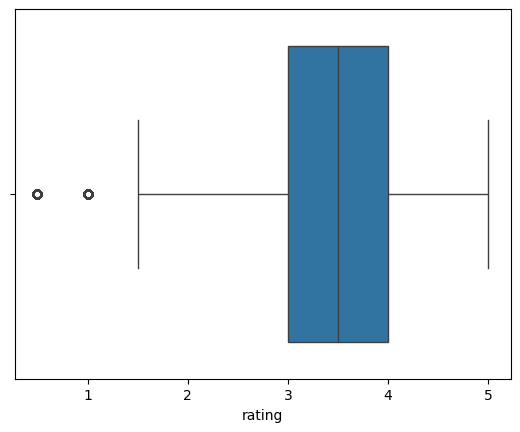

In [14]:
sns.boxplot(x=ratings_df['rating'])
plt.show()

Dari boxplot diatas, kita dapat mengidentifikasi **outliers** (pencilan) dalam data:

1. **Garis tengah kotak** menunjukkan **median** dari data `rating`.
2. **Kotak** menunjukkan rentang dari **kuartil pertama (Q1)** hingga **kuartil ketiga (Q3)**, menggambarkan **interquartile range (IQR)**, yaitu rentang tengah 50% dari data.
3. **Garis-garis horizontal** (whiskers) yang keluar dari kotak menunjukkan rentang data di luar Q1 dan Q3, umumnya diperpanjang hingga 1,5 kali IQR dari kuartil terendah (Q1) dan tertinggi (Q3).
4. **Titik-titik** di luar whiskers adalah **outliers**. Titik-titik ini mewakili nilai yang berada di luar rentang 1,5 kali IQR dari Q1 dan Q3, menandakan nilai `rating` yang jauh dari mayoritas data.

**10. Membatasi nilai outliers menggunakan metode IQR**

In [15]:
Q1 = ratings_df['rating'].quantile(0.25)
Q3 = ratings_df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(1, Q1 - 1.5 * IQR)
upper_bound = min(5, Q3 + 1.5 * IQR)

# ratings_df = ratings_df[~((ratings_df['rating'] < (Q1 - 1.5 * IQR)) | (ratings_df['rating'] > (Q3 + 1.5 * IQR)))]
ratings_df = ratings_df[~((ratings_df['rating'] < lower_bound) | (ratings_df['rating'] > upper_bound))]
ratings_df.shape

(96655, 4)

Dari hasil pembatasan outliers diatas data rating menjadi 96.655 data, yang semula 100836 data sebelum dilakukannya outliers.

In [16]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,96655.000000,96655.000000,96655.000000,9.665500e+04
mean,325.902033,19444.327991,3.616854,1.206291e+09
std,182.574908,35476.406628,0.900495,2.161295e+08
min,1.000000,1.000000,1.500000,8.281246e+08
25%,177.000000,1198.000000,3.000000,1.019127e+09
50%,326.000000,2991.000000,4.000000,1.186161e+09
75%,477.000000,8228.000000,4.000000,1.435993e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**11. Menampilkan dataset outliers yang telah dibersihkan**

In [17]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96655 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     96655 non-null  int64  
 1   movieId    96655 non-null  int64  
 2   rating     96655 non-null  float64
 3   timestamp  96655 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.7 MB


Hasil akhir deskripsi variabel dataset `ratings.csv` setelah dilakukan pembersihan outliers

**12. Mengecek data duplikat dari setiap dataset**

In [18]:
# Mengecek duplikat di setiap dataframe
def check_duplicates(df, df_name):
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
        print(f"{df_name}: Terdapat {len(duplicate_rows)} baris duplikat")
        print(duplicate_rows.head())  # Menampilkan contoh duplikat
    else:
        print(f"{df_name}: Tidak ada duplikat")

check_duplicates(links_df, 'links_df')
check_duplicates(movies_df, 'movies_df')
check_duplicates(ratings_df, 'ratings_df')
check_duplicates(tags_df, 'tags_df')

links_df: Tidak ada duplikat
movies_df: Tidak ada duplikat
ratings_df: Tidak ada duplikat
tags_df: Tidak ada duplikat


## **Data Preparation**

**1. Menggabungkan seluruh `movieId` pada kategori film**

In [19]:
movies_all_df = np.concatenate((
    links_df['movieId'].unique(),
    movies_df['movieId'].unique(),
    ratings_df['movieId'].unique(),
    tags_df['movieId'].unique()
))

movies_all_df = np.sort(np.unique(movies_all_df))

print('Jumlah seluruh data film berdasarkan `movieId`: ', len(movies_all_df))

Jumlah seluruh data film berdasarkan `movieId`:  9742


**2. Menggabungkan seluruh `userId` pada kategori film**

In [20]:
users_all_df = np.concatenate((
    ratings_df['userId'].unique(),
    tags_df['userId'].unique()
))

users_all_df = np.sort(np.unique(users_all_df))

print('Jumlah seluruh data pengguna berdasarkan `userId`: ', len(users_all_df))

Jumlah seluruh data pengguna berdasarkan `userId`:  610


**3. Menggabungkan file links, movies, ratings, dan tags**

In [21]:
movies_info_df = pd.concat([links_df, movies_df, tags_df])
movies_info_merge_df = pd.merge(ratings_df, movies_info_df, on='movieId', how='left')
movies_info_merge_df.head()

,userId_x,movieId,rating,timestamp_x,imdbId,tmdbId,title,genres,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,336.0,pixar,1.139046e+09
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,474.0,pixar,1.137207e+09
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,567.0,fun,1.525286e+09


**4. Cek missing value dengan fungsi isnull()**

In [22]:
movies_info_merge_df.isnull().sum()

,0
userId_x,0
movieId,0
rating,0
timestamp_x,0
imdbId,324239
tmdbId,324239
title,324229
genres,324229
userId_y,193300
tag,193300


**5. Menghitung jumlah rating berdasarkan `movieId`**

In [23]:
movies_info_merge_df.groupby('movieId').sum()

,userId_x,rating,timestamp_x,imdbId,tmdbId,title,genres,userId_y,tag,timestamp_y
movieId,,,,,,,,,,
1,329140,4212.5,1207376449655,24547726.0,184468.0,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,294678.0,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...,8.135293e+11
2,214824,2256.0,735516273306,12257676.0,955152.0,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,71280.0,fantasymagic board gameRobin Williamsgamefanta...,6.181820e+11
3,53504,664.0,191241381604,5434944.0,748896.0,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,27744.0,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...,1.097688e+11
4,2554,31.0,10899491690,689310.0,188142.0,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,0.0,0,0.000000e+00
5,56756,600.0,189264729156,5425968.0,569376.0,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,45504.0,pregnancyremakepregnancyremakepregnancyremakep...,1.091879e+11
...,...,...,...,...,...,...,...,...,...,...
193581,368,8.0,3074218164,5476944.0,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0.0,0,0.000000e+00
193583,368,7.0,3074219090,5914996.0,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0.0,0,0.000000e+00
193585,368,7.0,3074219610,6397426.0,479308.0,Flint (2017),Drama,0.0,0,0.000000e+00


**6. Menggabungkan seluruh data film dengan rating**

In [24]:
movies_all_rate_df = ratings_df
movies_all_rate_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


**7. Menggabungkan seluruh data film dengan data film berdasarkan `movieId`**

In [25]:
movies_all_name_df = pd.merge(movies_all_rate_df, movies_df[['movieId', 'title', 'genres']], on='movieId', how='left')
movies_all_name_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
96650,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
96651,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
96652,610,168250,5.0,1494273047,Get Out (2017),Horror
96653,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


**8. Menggabungkan seluruh data film dengan data tags berdasarkan `movieId`**

In [26]:
movies_all_data_df = pd.merge(movies_all_name_df, tags_df[['movieId', 'tag']], on='movieId', how='left')
movies_all_data_df

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
277195,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
277196,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
277197,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
277198,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


**9. Mengatasi missing value pada `movies_all_data_df`**

In [27]:
movies_all_data_df.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,49616


**10. Membersihkan missing value menggunakan fungsi dropna()**

In [28]:
movies_all_data_clean_df = movies_all_data_df.dropna()
movies_all_data_clean_df.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,0


**11. Mengurutkan film berdasarkan `movieId`**

In [29]:
movies_fix_df = movies_all_data_clean_df.sort_values(by='movieId', ascending=True)
movies_fix_df

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
165525,378,1,4.5,1445347576,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
5076,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
5075,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
5074,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
...,...,...,...,...,...,...,...
255637,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke
78137,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
78138,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
78139,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,gintama


**12. Mengecek jumlah `movies_fix_df`**

In [30]:
len(movies_fix_df.tag.unique())

1583

**13. Membuat variabel `movies_preparation_df` yang berisi `movies_fix_df` kemudian mengurutkan berdasarkan `movieId`**

In [31]:
movies_preparation_df = movies_fix_df
movies_preparation_df.sort_values(by='movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
239035,550,1,4.0,1488728441,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
239034,550,1,4.0,1488728441,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
238510,544,1,3.0,850688537,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
22459,54,1,3.0,830247330,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
...,...,...,...,...,...,...,...
168438,380,187595,4.0,1536872728,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
78138,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
78139,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,gintama
78137,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime


**14. Membuang data duplikat pada variabel `movies_preparation_df`**

In [32]:
movies_preparation_df = movies_preparation_df.drop_duplicates('movieId')
movies_preparation_df

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
141100,321,2,5.0,843212595,Jumanji (1995),Adventure|Children|Fantasy,game
70882,169,3,5.0,1078284750,Grumpier Old Men (1995),Comedy|Romance,moldy
52996,121,5,3.0,847656405,Father of the Bride Part II (1995),Comedy,pregnancy
202666,451,7,3.0,854089243,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
26421,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
230156,514,184471,3.0,1533946968,Tomb Raider (2018),Action|Adventure|Fantasy,adventure
108668,249,187593,5.0,1531611534,Deadpool 2 (2018),Action|Comedy|Sci-Fi,Josh Brolin
230170,514,187595,3.0,1537674946,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


**15. Mengonversi data series menjadi dalam bentuk list**

In [33]:
movies_id = movies_preparation_df['movieId'].tolist()
movies_title = movies_preparation_df['title'].tolist()
movies_genre = movies_preparation_df['genres'].tolist()

print(len(movies_id))
print(len(movies_title))
print(len(movies_genre))

1551
1551
1551


**16. Membuat dictionary**

In [34]:
# Membuat dictionary untuk data `movieId`, `title`, dan `genre`
movies_dict = pd.DataFrame({
    'movieId' : movies_id,
    'title' : movies_title,
    'genres' : movies_genre
})

movies_dict

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1546,183611,Game Night (2018),Action|Comedy|Crime|Horror
1547,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1548,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1549,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


## **Model Development**

### **Content Based Filtering**

**1. Cek data dari `movies_dict`**

In [35]:
movies_data = movies_dict
movies_data.sample(5)

,movieId,title,genres
107,425,Blue Sky (1994),Drama|Romance
964,6183,Pillow Talk (1959),Comedy|Musical|Romance
78,300,Quiz Show (1994),Drama
372,1361,Paradise Lost: The Child Murders at Robin Hood...,Documentary
413,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller


**2. Inisialisasi TfidVectorizer dan melakukan perhitungan pada genres lalu mapping array**

In [36]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada movies_data genres
tf.fit(movies_data['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

**3. Melakukan fit transformasi matrix**

In [37]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(movies_data['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1551, 24)

**4. Mengubah vektor tf-idf ke matriks dengan fitur todense()**

In [38]:
tfidf_matrix.todense()

matrix([[0.        , 0.39822328, 0.52243144, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49492351, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49400457, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39636482, 0.40790255, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41098241, 0.        , 0.55486485, ..., 0.        , 0.        ,
         0.        ]])

**5. Membuat dataframe untuk melihat tf-idf matrix**

In [39]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movies_data.title
).sample(10, axis=1).sample(10, axis=0)

,imax,animation,action,crime,adventure,documentary,genres,film,mystery,noir
title,,,,,,,,,,
"Night of the Hunter, The (1955)",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.643755,0.000000,0.643755
"Illusionist, The (2006)",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.598947,0.000000
Father of the Bride (1950),0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
"Women, The (1939)",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
About a Boy (2002),0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
E.T. the Extra-Terrestrial (1982),0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Rebecca (1940),0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.655905,0.000000
Stargate (1994),0.0,0.0,0.465003,0.000000,0.478539,0.0,0.0,0.000000,0.000000,0.000000
"Wolf of Wall Street, The (2013)",0.0,0.0,0.000000,0.754779,0.000000,0.0,0.0,0.000000,0.000000,0.000000


**6. Menghitung cosine similarity pada matrix tf-idf**

In [40]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.8046158 , 0.18128581, ..., 0.10169496, 0.42937547,
        0.374483  ],
       [0.8046158 , 1.        , 0.        , ..., 0.        , 0.53364037,
        0.        ],
       [0.18128581, 0.        , 1.        , ..., 0.23143522, 0.        ,
        0.19254034],
       ...,
       [0.10169496, 0.        , 0.23143522, ..., 1.        , 0.69818373,
        0.8319405 ],
       [0.42937547, 0.53364037, 0.        , ..., 0.69818373, 1.        ,
        0.58084732],
       [0.374483  , 0.        , 0.19254034, ..., 0.8319405 , 0.58084732,
        1.        ]])

**7. Membuat variabel cosine_similarity**

In [41]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_data['title'], columns=movies_data['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1551, 1551)


title,In America (2002),Kiss Me Goodbye (1982),Blade (1998),Sense and Sensibility (1995),Series 7: The Contenders (2001)
title,,,,,
Apollo 13 (1995),0.140887,0.000000,0.000000,0.140887,0.127055
This Is Spinal Tap (1984),0.000000,1.000000,0.000000,0.000000,0.000000
"History of Violence, A (2005)",0.161214,0.000000,0.538645,0.161214,0.631751
Misery (1990),0.169467,0.000000,0.807524,0.169467,0.152830
Shadow of the Thin Man (1941),0.000000,0.415894,0.000000,0.000000,0.000000
"11'09""01 - September 11 (2002)",0.531946,0.000000,0.000000,0.531946,0.479722
The Greatest Showman (2017),0.531946,0.000000,0.000000,0.531946,0.479722
Why We Fight (2005),0.000000,0.000000,0.000000,0.000000,0.000000
Zoolander (2001),0.000000,1.000000,0.000000,0.000000,0.000000


**8. Membuat fungsi rekomendasi film**

In [42]:
def movies_recommendation(title, similarity_data=cosine_sim_df, items=movies_data[['title', 'genres']], k=5):
  index = similarity_data.loc[:,title].to_numpy().argpartition(range(-1,-k,-1))
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(title, errors='ignore')
  return pd.DataFrame(closest).merge(items).head(k)

**9. Mendapatkan film yang disukai pengguna**

In [43]:
movies_data[movies_data.title.eq('Zelary (2003)')]

,movieId,title,genres
1288,31903,Zelary (2003),Drama|Romance


Pada tahap ini menampilkan data film yang disukai pengguna

**10. Mendapatkan rekomendasi film**

In [44]:
movies_recommendation('Zelary (2003)')

,title,genres
0,M. Butterfly (1993),Drama|Romance
1,Nicholas Nickleby (2002),Drama|Romance
2,Far from Heaven (2002),Drama|Romance
3,Talk to Her (Hable con Ella) (2002),Drama|Romance
4,Before Sunrise (1995),Drama|Romance


Pada tahap ini menghasilkan output top 5 rekomendasi film

### **Collaborative Filtering**

**1. Membaca dataset**

In [45]:
ratings = ratings_df
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


**2. Encode pada data user**

In [46]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_id = ratings['userId'].unique().tolist()
print('List user id', user_id)

# Melakukan encoding userId
user2user_encoded = {x: i for i, x in enumerate(sorted(user_id))}
print('Encoding user id', user2user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(sorted(user_id))}
print('Encoding angka ke userId', user_encoded_to_user)

List user id [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

**3.  Encode pada data title**

In [47]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_id = ratings['movieId'].unique().tolist()
print('List movie id', movie_id)

# Melakukan encoding movieId
movie2movie_encoded = {x: i for i, x in enumerate(sorted(movie_id))}
print('Encoding movie id', movie2movie_encoded)

# Melakukan proses encoding angka ke ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(sorted(movie_id))}
print('Encoding angka ke movieId', movie_encoded_to_movie)

List movie id [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 2641,

**4. Mempetakan userId dan movieId**

In [48]:
# Mapping userId ke dataframe user
ratings['user'] = ratings['userId'].map(user2user_encoded)
ratings

# Mapping movieId ke dataframe movie
ratings['movie'] = ratings['movieId'].map(movie2movie_encoded)
ratings

,userId,movieId,rating,timestamp,user,movie
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,2
2,1,6,4.0,964982224,0,5
3,1,47,5.0,964983815,0,43
4,1,50,5.0,964982931,0,46
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,609,9184
100832,610,168248,5.0,1493850091,609,9209
100833,610,168250,5.0,1494273047,609,9210
100834,610,168252,5.0,1493846352,609,9211


**5. Cek data mapping**

In [49]:
# Mendapatkan jumlah user
num_users = len(user2user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movies = len(movie_encoded_to_movie)
print(num_movies)

# Mengubah rating menjadi nilai float
ratings['rating'] = ratings['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(ratings['rating'])

# Nilai maksimal rating
max_rating = max(ratings['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movies, min_rating, max_rating
))

610
9477
Number of User: 610, Number of Movie: 9477, Min Rating: 1.5, Max Rating: 5.0


**6. Acak data untuk training dan test**

In [50]:
train_test_df = ratings.sample(frac=1, random_state=42)
train_test_df

,userId,movieId,rating,timestamp,user,movie
40376,274,51935,4.0,1239122720,273,6304
55452,368,434,3.0,975828314,367,377
97328,605,54190,4.0,1277096020,604,6384
11141,68,7143,4.5,1158532025,67,4697
11109,68,6539,5.0,1158531197,67,4337
...,...,...,...,...,...,...
6585,45,1101,4.0,1091306211,44,832
57267,380,3113,4.0,1494804180,379,2314
80042,502,903,3.5,1111757298,501,679
913,7,1954,4.5,1106635657,6,1415


**7. Membagi data untuk train test**

In [51]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = train_test_df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = train_test_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * train_test_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 273 6304]
 [ 367  377]
 [ 604 6384]
 ...
 [ 501  679]
 [   6 1415]
 [ 104 3566]] [0.71428571 0.42857143 0.71428571 ... 0.57142857 0.85714286 0.71428571]


## **Training Process**

**1. Membuat class RecommenderNet**

In [52]:
import tensorflow as tf
import keras
from keras import layers

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movies_embedding = layers.Embedding( # layer embeddings movies
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movies_bias = layers.Embedding(num_movies, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movies_vector = self.movies_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movies_bias = self.movies_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movies = tf.tensordot(user_vector, movies_vector, 2)

    x = dot_user_movies + user_bias + movies_bias

    return tf.nn.sigmoid(x) # activation sigmoid

**2. Melakukan proses compile terhadap model**

In [53]:
model = RecommenderNet(num_users, num_movies, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**3. Melakukan proses training**

In [54]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - loss: 0.6752 - root_mean_squared_error: 0.2606 - val_loss: 0.6492 - val_root_mean_squared_error: 0.2382
Epoch 2/100
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 0.6484 - root_mean_squared_error: 0.2340 - val_loss: 0.6471 - val_root_mean_squared_error: 0.2358
Epoch 3/100
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.6430 - root_mean_squared_error: 0.2284 - val_loss: 0.6395 - val_root_mean_squared_error: 0.2283
Epoch 4/100
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.6387 - root_mean_squared_error: 0.2251 - val_loss: 0.6413 - val_root_mean_squared_error: 0.2299
Epoch 5/100
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.6373 - root_mean_squared_error: 0.2218 - val_loss: 0.6395 - val_root_mean_squared_error: 0.2281
Epoch 6/100
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.6352 - root_mean_squared_error: 0.2207 - val_loss: 0.6392 - val_root_mean_squared_error: 0.2277
Epoch 7/100
1209/1209 ━━━━━

**4. Menampilkan plot evaluasi**

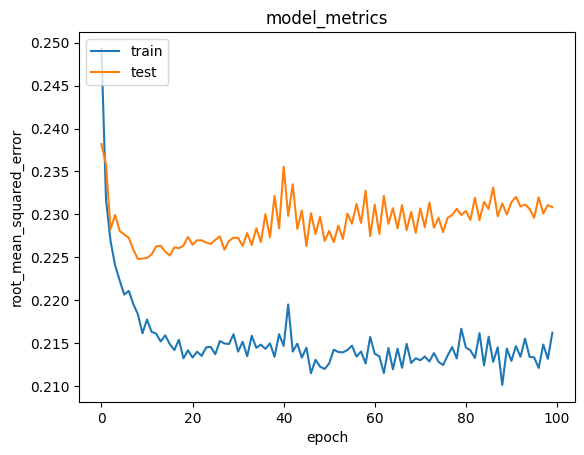

In [55]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot di atas menunjukkan nilai *root mean squared error* (RMSE) dari data latih (train) dan data uji (test) seiring bertambahnya *epoch*. Awalnya, RMSE pada kedua data menurun, menunjukkan model belajar dengan baik. Namun, setelah *epoch* 10-20, RMSE pada data uji mulai stabil dan sedikit meningkat, sementara RMSE pada data latih terus menurun. Ini adalah tanda *overfitting*, di mana model hanya bekerja baik pada data latih, tetapi tidak pada data uji. Untuk mengatasi hal ini, metode seperti *regularization*, *dropout*, atau *early stopping* dapat diterapkan agar model lebih baik dalam menggeneralisasi data baru.

**5. Mendapatkan rekomendasi film**

In [56]:
data_df = movies_dict
df = pd.read_csv('/content/ml-latest-small/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]

movies_not_watched = data_df[~data_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']
movies_not_watched = list(set(movies_not_watched).intersection(set(movie2movie_encoded.keys())))
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watched), movies_not_watched))

In [57]:
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [movie_encoded_to_movie[movies_not_watched[i][0]] for i in top_ratings_indices]

print(f'Menampilkan rekomendasi untuk pengguna: {user_id}')
print('=' * 32)
print('Film dengan rating tinggi dari pengguna')
print('-' * 32)

# Menampilkan 5 film dengan rating tertinggi dari pengguna
top_movies_user = movies_watched_by_user.nlargest(5, 'rating').movieId.values
for _, row in movies_df[movies_df['movieId'].isin(top_movies_user)].iterrows():
    print(f"{row.title} : {row.genres}")

print('-' * 32)
print('10 film teratas yang direkomendasikan')
print('-' * 32)

# Menampilkan 10 film teratas yang direkomendasikan
for _, row in movies_df[movies_df['movieId'].isin(recommended_movie_ids)].iterrows():
    print(f"{row.title} : {row.genres}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Menampilkan rekomendasi untuk pengguna: 509
Film dengan rating tinggi dari pengguna
--------------------------------
Little Princess, A (1995) : Children|Drama
Lord of the Rings: The Fellowship of the Ring, The (2001) : Adventure|Fantasy
Lord of the Rings: The Two Towers, The (2002) : Adventure|Fantasy
Lord of the Rings: The Return of the King, The (2003) : Action|Adventure|Drama|Fantasy
Pitch Perfect 2 (2015) : Comedy
--------------------------------
10 film teratas yang direkomendasikan
--------------------------------
Place in the Sun, A (1951) : Drama|Romance
My Life (1993) : Drama
Crossing Delancey (1988) : Comedy|Romance
Europa Europa (Hitlerjunge Salomon) (1990) : Drama|War
Woman Under the Influence, A (1974) : Drama
Jetée, La (1962) : Romance|Sci-Fi
Into the Woods (1991) : Adventure|Comedy|Fantasy|Musical
It's Such a Beautiful Day (2012) : Animation|Comedy|Drama|Fantasy|Sci-Fi
Frank (2014) : Comedy|Drama|Mystery
Black Mirror: White Christm

In [58]:
# Menampilkan rekomendasi untuk pengguna
print(f'Menampilkan rekomendasi untuk pengguna: {user_id}')
print('=' * 50)

# Menampilkan 5 film dengan rating tertinggi dari pengguna dalam bentuk tabel
top_movies_user_df = movies_df[movies_df['movieId'].isin(top_movies_user)][['title', 'genres']]
top_movies_user_df.columns = ['Title', 'Genres']  # Menyusun ulang nama kolom

print('Film dengan rating tertinggi dari pengguna:')
print('-' * 50)
print(top_movies_user_df.to_string(index=False))

print('\n' + '-' * 50)

# Menampilkan 10 film teratas yang direkomendasikan dalam bentuk tabel
recommended_movies_df = movies_df[movies_df['movieId'].isin(recommended_movie_ids)][['title', 'genres']]
recommended_movies_df.columns = ['Title', 'Genres']  # Menyusun ulang nama kolom

print('10 film teratas yang direkomendasikan:')
print('-' * 50)
print(recommended_movies_df.to_string(index=False))


Menampilkan rekomendasi untuk pengguna: 509
Film dengan rating tertinggi dari pengguna:
--------------------------------------------------
                                                    Title                         Genres
                                Little Princess, A (1995)                 Children|Drama
Lord of the Rings: The Fellowship of the Ring, The (2001)              Adventure|Fantasy
            Lord of the Rings: The Two Towers, The (2002)              Adventure|Fantasy
    Lord of the Rings: The Return of the King, The (2003) Action|Adventure|Drama|Fantasy
                                   Pitch Perfect 2 (2015)                         Comedy

--------------------------------------------------
10 film teratas yang direkomendasikan:
--------------------------------------------------
                                     Title                                Genres
                Place in the Sun, A (1951)                         Drama|Romance
                       